In [1]:
#make sure you have these versions of TensorFlow and Keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf 
import keras
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

2024-04-02 01:23:52.916489: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 01:23:52.979125: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 01:23:52.979930: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 01:23:54.095415: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
##loading data
train=pd.read_table('train.txt', delimiter = ';', header=None, )
val=pd.read_table('val.txt', delimiter = ';', header=None, )
test=pd.read_table('test.txt', delimiter = ';', header=None, )

data = pd.concat([train ,  val , test])
data.columns = ["text", "label"]

In [4]:
data.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
data['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [6]:
data.shape

(20000, 2)

In [7]:
data.isna().any(axis=1).sum()

0

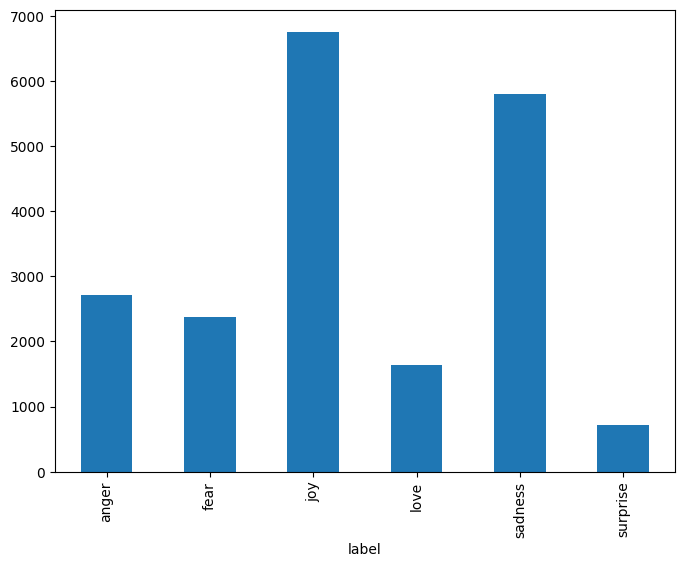

In [8]:
#To get the plot of the emotion distribution in data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

In [9]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)


In [10]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muskannns/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
data['text']=data['text'].apply(lambda x: preprocess(x))


In [12]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['N_label'] = label_encoder.fit_transform(data['label'])


In [13]:
data['text']

0                                       didnt feel humili
1       go feel hopeless damn hope around someon care ...
2                    im grab minut post feel greedi wrong
3          ever feel nostalg fireplac know still properti
4                                            feel grouchi
                              ...                        
1995    keep feel like someon unkind wrong think get b...
1996              im feel littl cranki neg doctor appoint
1997                feel use peopl give great feel achiev
1998    im feel comfort derbi feel though start step s...
1999    feel weird meet w peopl text like dont talk fa...
Name: text, Length: 20000, dtype: object

In [14]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))#example: the course was long-> [the,the course,the course was,course, course was, course was long,...]

data_cv = cv.fit_transform(data['text']).toarray()




In [15]:
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_cv, data['N_label'], test_size=0.25, random_state=42)


In [17]:
# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
# split into input (X) and output (y) variables
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10


2024-04-02 01:25:51.773032: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


1500/1500 [==============================] - 5s 3ms/step - loss: 0.9634 - accuracy: 0.6643
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2801 - accuracy: 0.9082
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1474 - accuracy: 0.9537
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0926 - accuracy: 0.9705
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9824
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0424 - accuracy: 0.9875
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0305 - accuracy: 0.9911
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0247 - accuracy: 0.9931
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0193 - accuracy: 0.9947
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0168 - accurac

2024-04-02 01:26:32.064942: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


469/469 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9965
Accuracy: 99.65


In [18]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

 49/157 [========>.....................] - ETA: 0s - loss: 0.7729 - accuracy: 0.8705

2024-04-02 01:26:39.338260: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 200000000 exceeds 10% of free system memory.


157/157 [==============================] - 0s 2ms/step - loss: 0.8398 - accuracy: 0.8544
Accuracy: 85.44


In [19]:
import numpy as np
text='I spilled a coffee'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 [==============================] - 0s 107ms/step


'anger'

 53/157 [=========>....................] - ETA: 0s

2024-04-02 01:26:46.782545: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 200000000 exceeds 10% of free system memory.


157/157 [==============================] - 0s 2ms/step


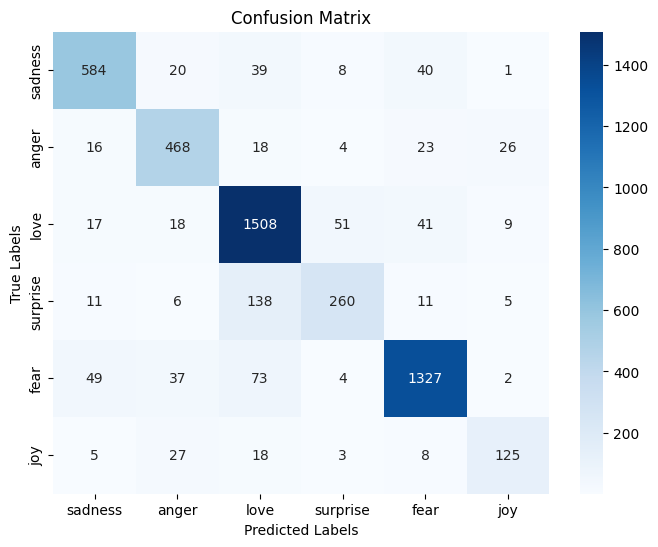

In [20]:
#the classes
classes = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

# Get the predicted probabilities for each class
y_pred_probs = model.predict(X_test)

# Get the class with the highest probability for each instance
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [21]:
tf.keras.models.save_model(model,'my_model.h5')


/tmp/ipykernel_8367/1493747194.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'my_model.h5')


In [22]:
import pickle
pickle.dump(label_encoder, open('encoder.pkl', 'wb'))
pickle.dump(cv, open('CountVectorizer.pkl', 'wb'))
